# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print( df_raw.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [4]:
#function
df_raw.describe()

/Users/ivanwan/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GPA is on a 1-4 scale and GRE is on an 800 point scale so the STD for GRE is much larger.

#### Question 4. Drop data points with missing data


In [5]:
df_dropna = df_raw.dropna()

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [6]:
df_raw.describe()

/Users/ivanwan/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


In [7]:
df_dropna.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


Answer: As shown in above table, no more NaN vaule in the new data frame.

#### Question 6. Create box plots for GRE and GPA

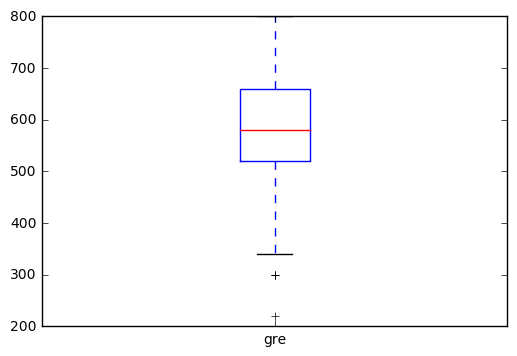

In [11]:
#boxplot 1
df_dropna['gre'].plot(kind='box')

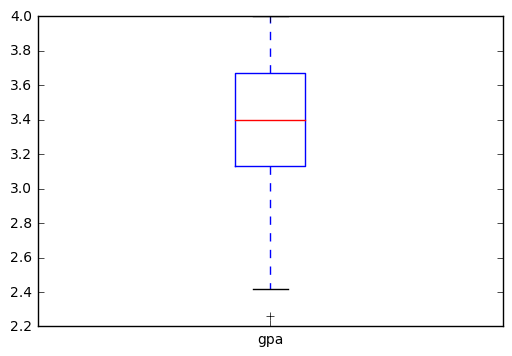

In [10]:
#boxplot 2 
df_dropna['gpa'].plot(kind='box')

#### Question 7. What do this plots show?

Answer: The plots shows the 25%-75%: 1st and 3rd Quantile are in the box. The red line is the median, and the end lines are the min and max. 

#### Question 8. Describe each distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ab05b38>]], dtype=object)

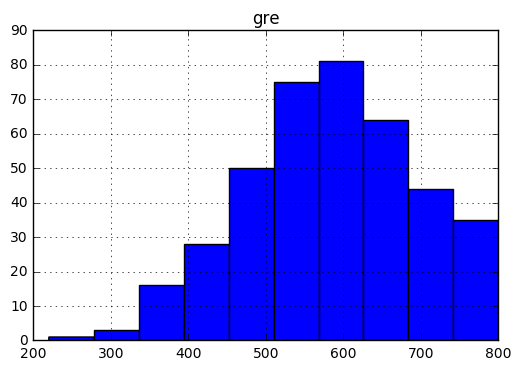

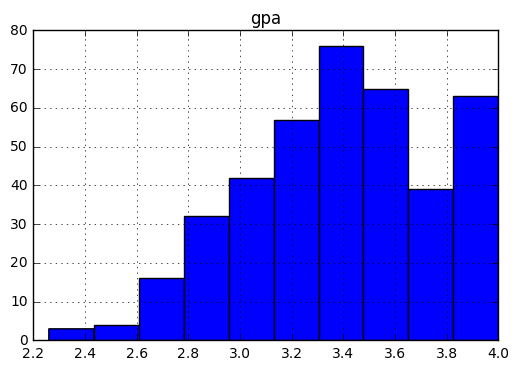

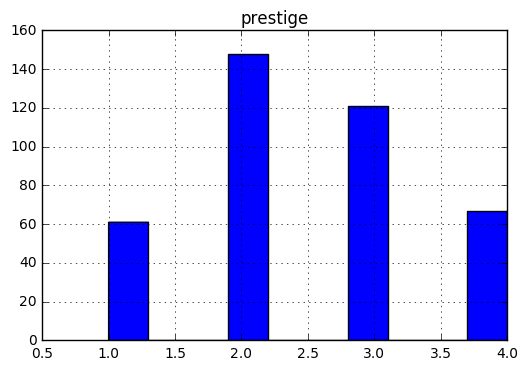

In [12]:
# plot the distribution of each variable 
df_dropna.hist('gre')
df_dropna.hist('gpa')
df_dropna.hist('prestige')

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No, both GPA and GRE skewed toward the bigger values.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: No, the distribution seems good for exploratory analysis.

#### Question 11. Which of our variables are potentially colinear? 

In [13]:
# create a correlation matrix for the data
df_dropna.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: GPA and GRE are colinear

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Check relation between admission data vs prestigious level (e.g using scatter graph), then use the same method using GPA and GRE scores to see if those have any effect as well.

#### Question 14. What is your hypothesis? 

Answer: A student is more likely to get admitted to the grad school if he came from a more prestigious undergraduate school.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data